In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

Show DataFrame info.
Describe DataFrame.
Show a plot of the total number of responses.
Show a plot of the response rate by the sales channel.
Show a plot of the response rate by the total claim amount.
Show a plot of the response rate by income.

In [2]:
data = pd.read_csv(r'C:\Users\Megha\Desktop\Ironhack\Week_1\Day_4\Afternoon\lab-customer-analysis-round-3\files_for_lab\csv_files\marketing_customer_analysis.csv')
data.tail()


,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large
9133,Y167826,California,2611.836866,No,Extended,College,2/14/11,Unemployed,M,0,...,90,0,1,Corporate Auto,Corporate L3,Offer4,Call Center,369.600000,Two-Door Car,Medsize


In [3]:
#Show DataFrame info.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [4]:
#Describe DataFrame.
data.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


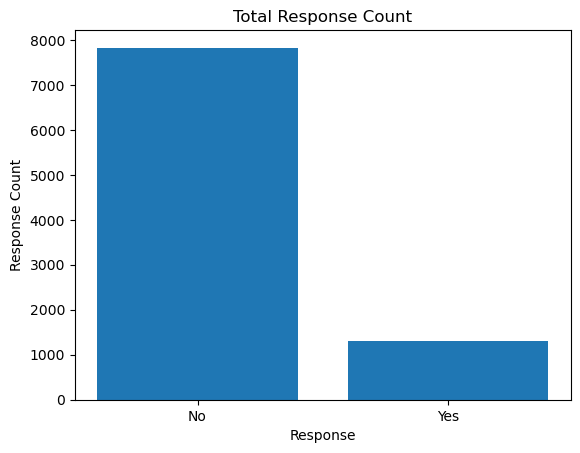

In [5]:
#Show a plot of the total number of responses.
fig, ax = plt.subplots()
ax.bar(x = data['Response'].value_counts().index, height = data['Response'].value_counts().values)
plt.xlabel('Response')
plt.ylabel('Response Count')
plt.title('Total Response Count')
plt.show()

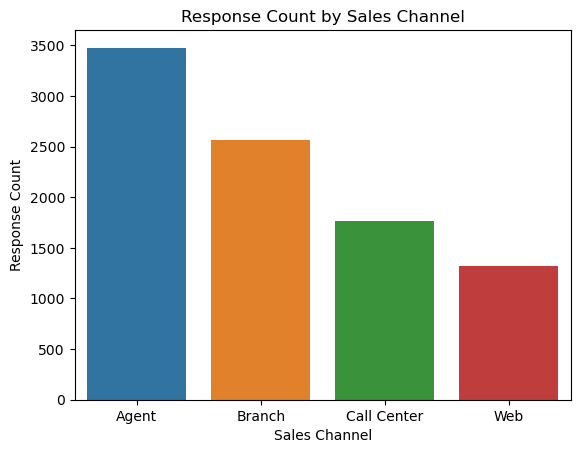

In [6]:
#Show a plot of the response rate by the sales channel.
fig, ax = plt.subplots()
group_sales = data.groupby("Sales Channel").agg({"Response":"count"}).reset_index()
group_sales.head()
sns.barplot(data=group_sales, x="Sales Channel", y="Response", ax = ax)
plt.xlabel('Sales Channel')
plt.ylabel('Response Count')
plt.title('Response Count by Sales Channel')
plt.show()

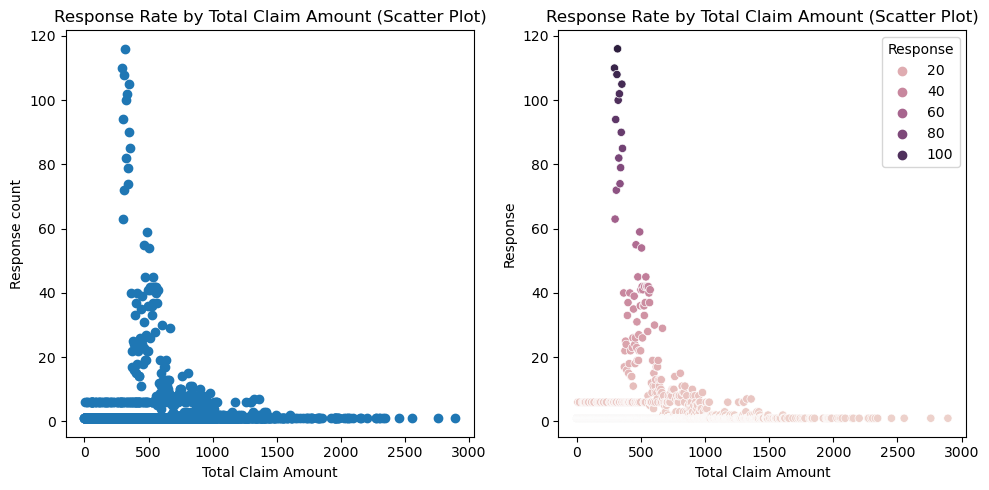

In [7]:
#Show a plot of the response rate by the total claim amount.
fix, ax = plt.subplots(1,2, figsize=(10,5))
claim_data= data.groupby("Total Claim Amount").agg({"Response":"count"}).reset_index()
ax[0].scatter(x=claim_data['Total Claim Amount'],y=claim_data['Response'])
ax[0].set_xlabel("Total Claim Amount")
ax[0].set_ylabel('Response count')
ax[0].set_title('Response Rate by Total Claim Amount (Scatter Plot)')
sns.scatterplot(claim_data, x='Total Claim Amount', y='Response',ax=ax[1],hue="Response")
plt.title('Response Rate by Total Claim Amount (Scatter Plot)')
plt.tight_layout()
plt.show()

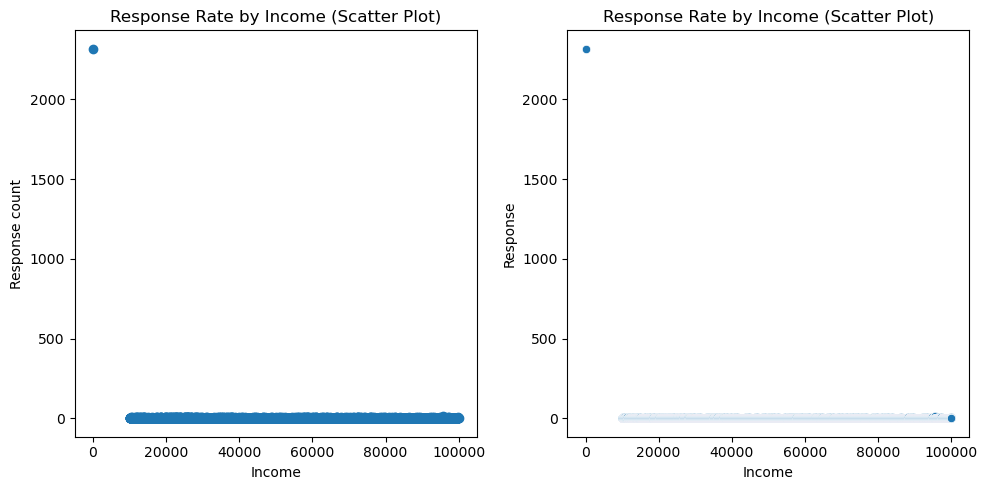

In [8]:
#Show a plot of the response rate by income.
fix, ax = plt.subplots(1,2, figsize=(10,5))
income_data= data.groupby("Income").agg({"Response":"count"}).reset_index()
ax[0].scatter(x=income_data['Income'],y=income_data['Response'])
ax[0].set_xlabel("Income")
ax[0].set_ylabel('Response count')
ax[0].set_title('Response Rate by Income (Scatter Plot)')
sns.scatterplot(data=income_data, x='Income', y='Response',ax=ax[1])
plt.title('Response Rate by Income (Scatter Plot)')
plt.tight_layout()
plt.show()

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# The line down below is needed to prevent matplotlib to open the graph in a seaparate popup window. 
%matplotlib inline

In [10]:
data = pd.read_csv('marketing_customer_analysis.csv')
data.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [11]:
#Check the data types of the columns. Get the numeric data into dataframe called numerical and categorical columns in a
#dataframe called categoricals. (You can use np.number and np.object to select the 
#numerical data types and categorical data types respectively)
numerical = data.select_dtypes(include=np.number)
categoricals=data.select_dtypes(include=object)
display(numerical.head())
display(categoricals.head())

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


,Customer,State,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size
0,BU79786,Washington,No,Basic,Bachelor,2/24/11,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,1/31/11,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,2/19/11,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,1/20/11,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,2/3/11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


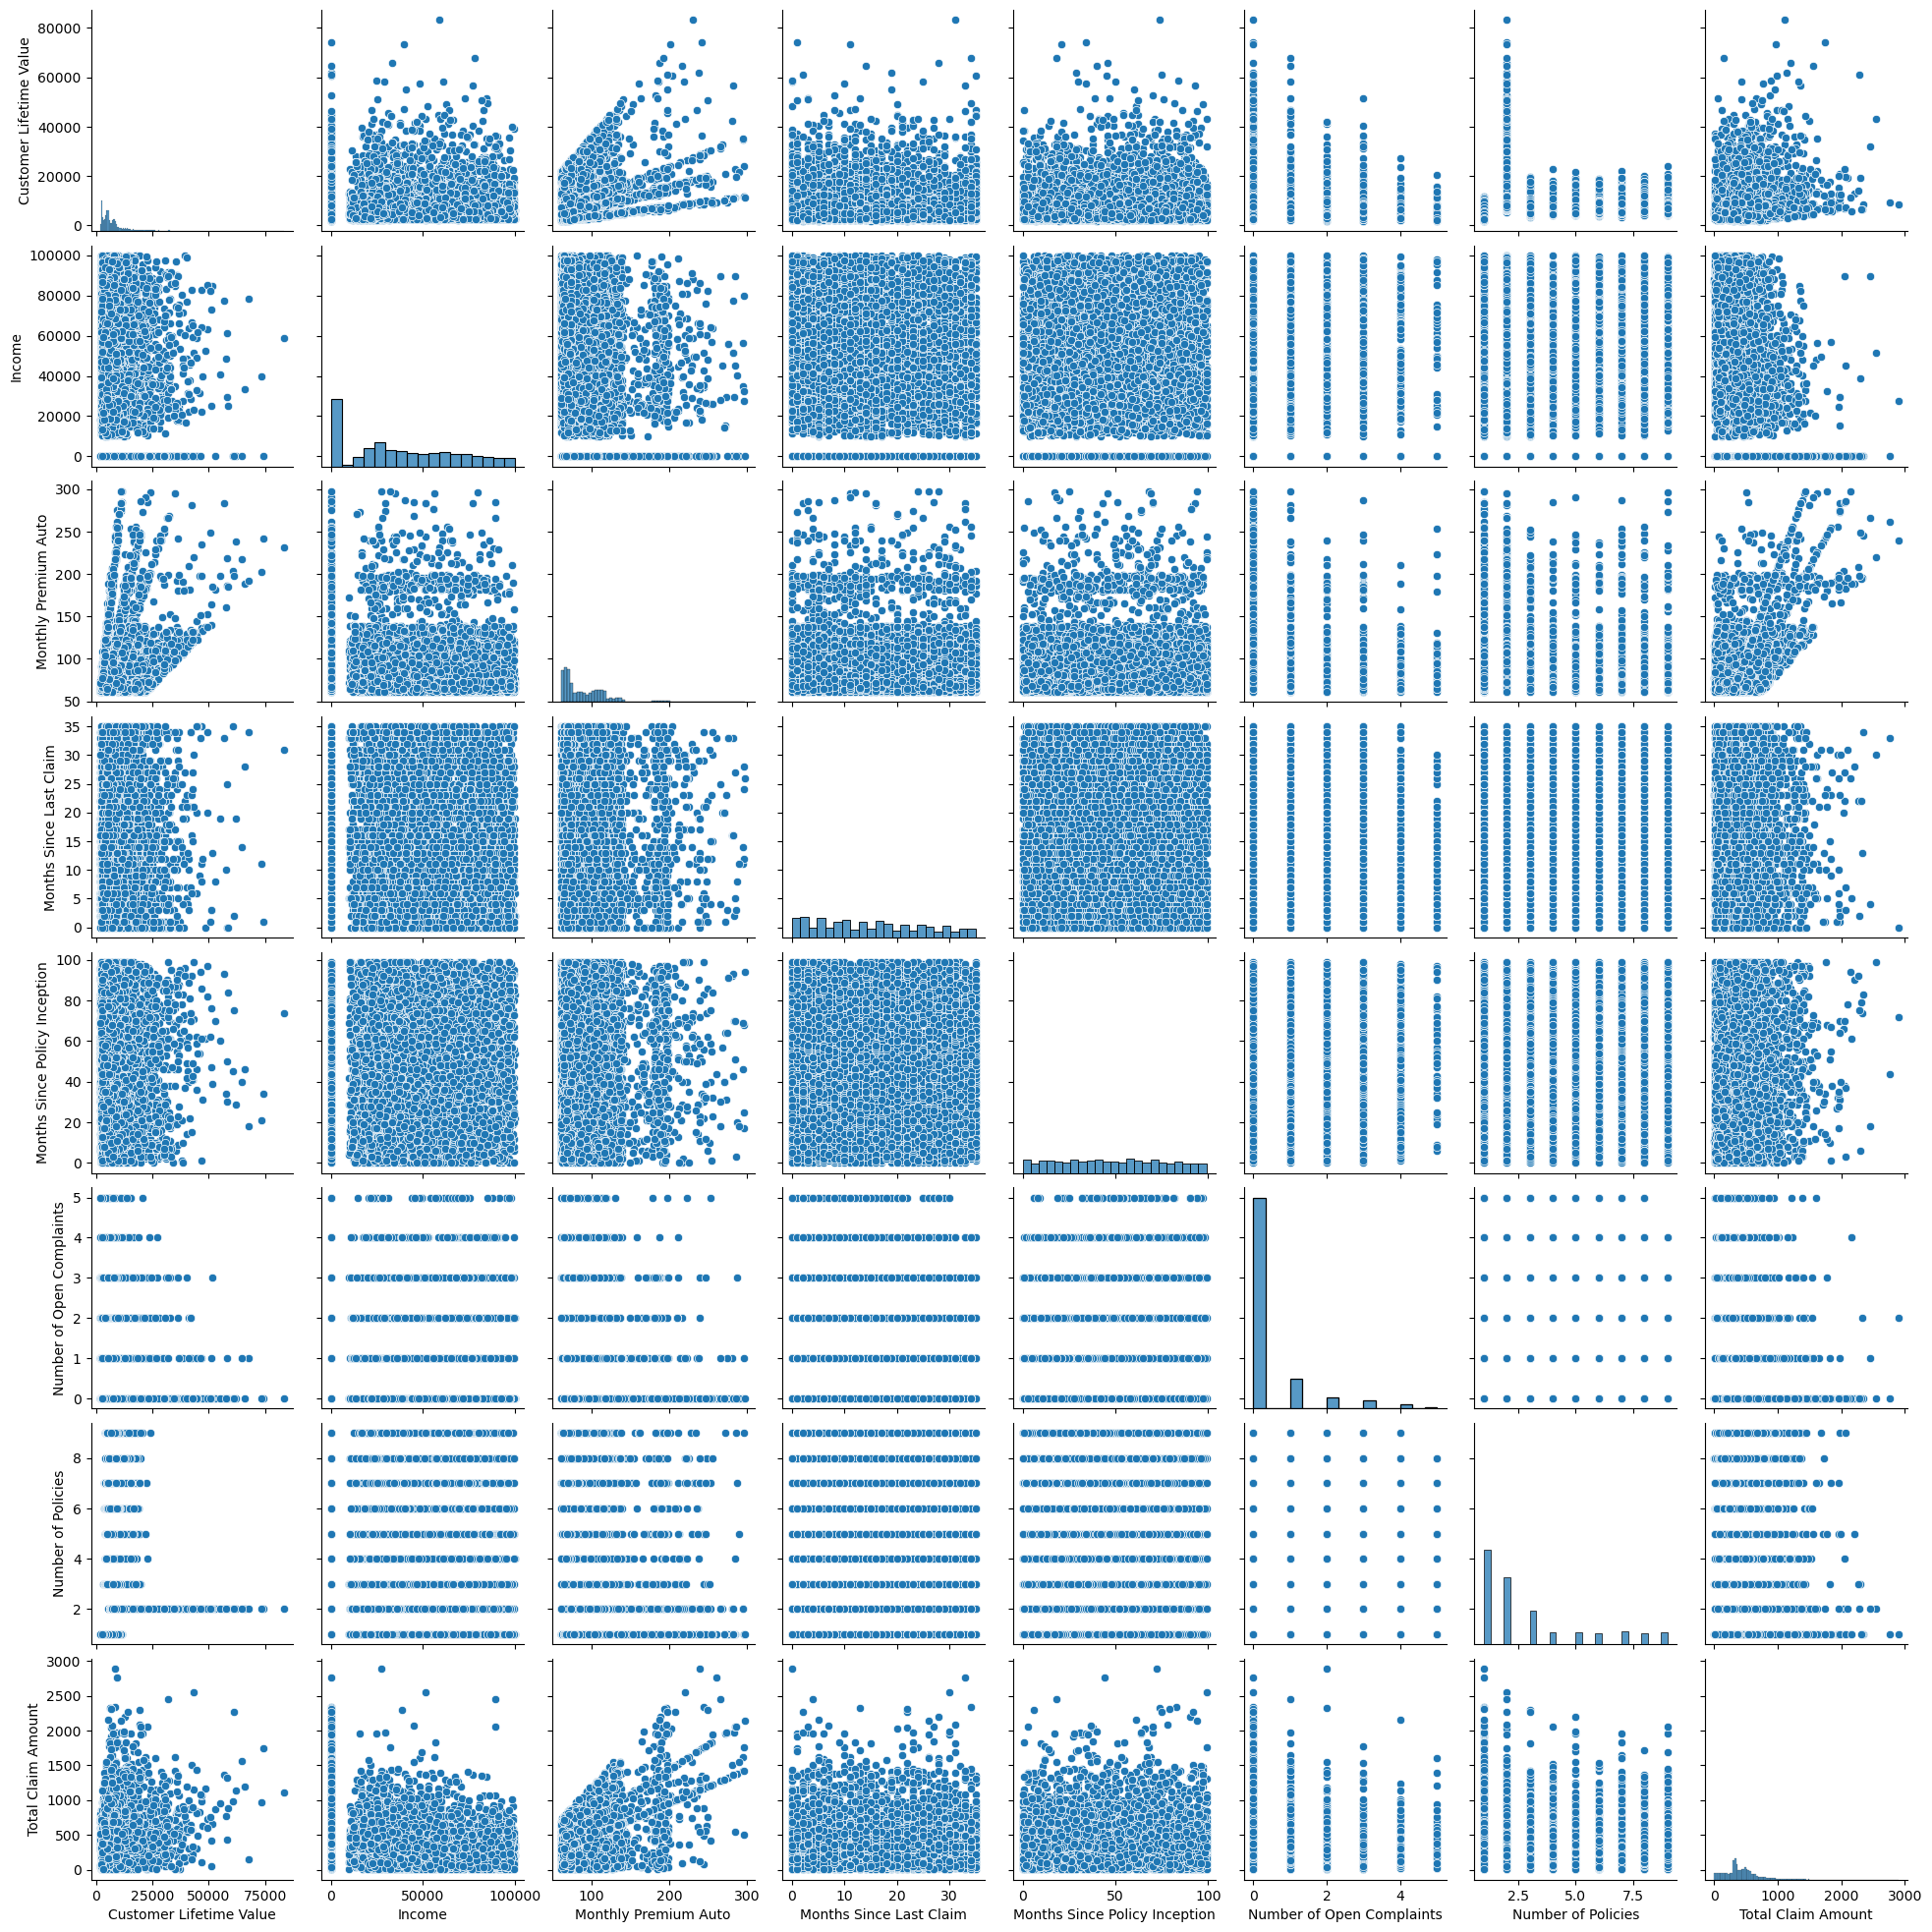

In [12]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
sns.pairplot(data.select_dtypes(np.number))
plt.show()

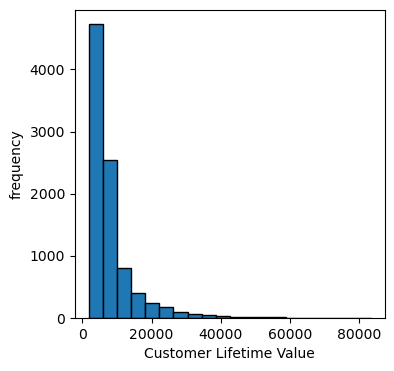

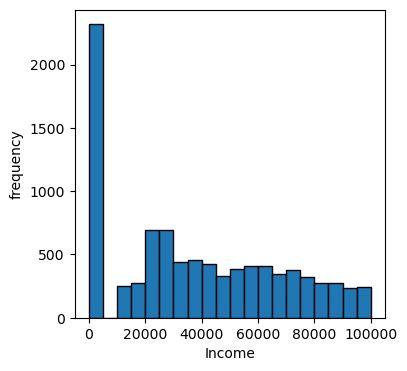

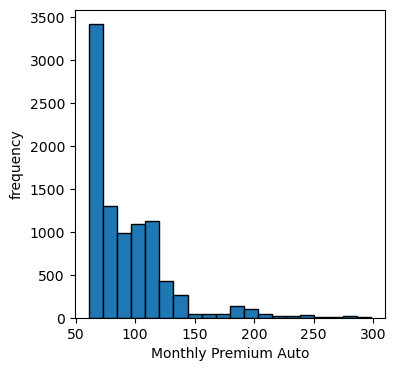

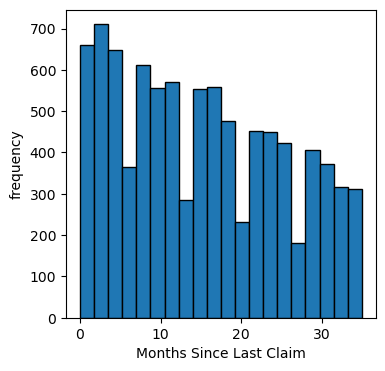

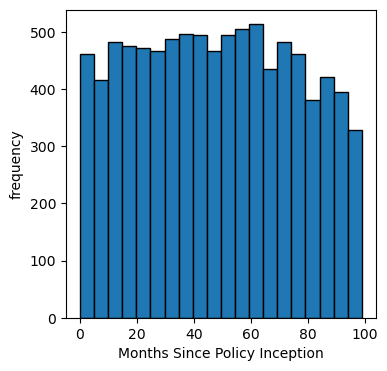

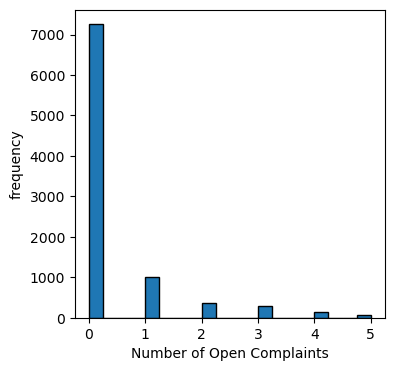

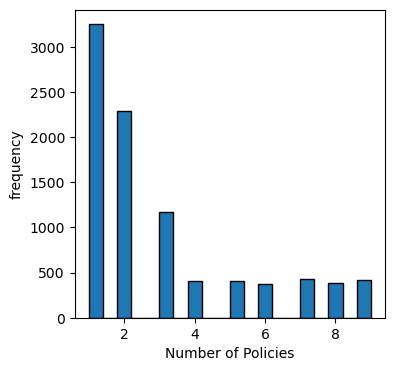

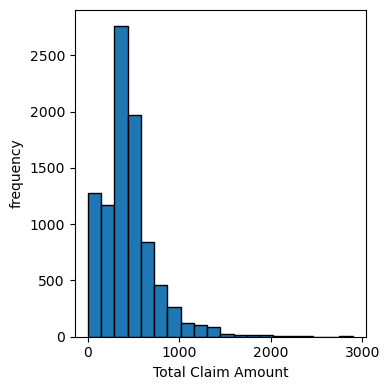

In [13]:
#Use Matplotlib to construct histograms
numerical = data.select_dtypes(include=np.number)
for column in numerical:
    plt.figure(figsize=(4, 4))
    
    # Plot the histogram
    plt.hist(data[column], bins=20, edgecolor='k')
    plt.xlabel(column)
    plt.ylabel("frequency")
plt.tight_layout()

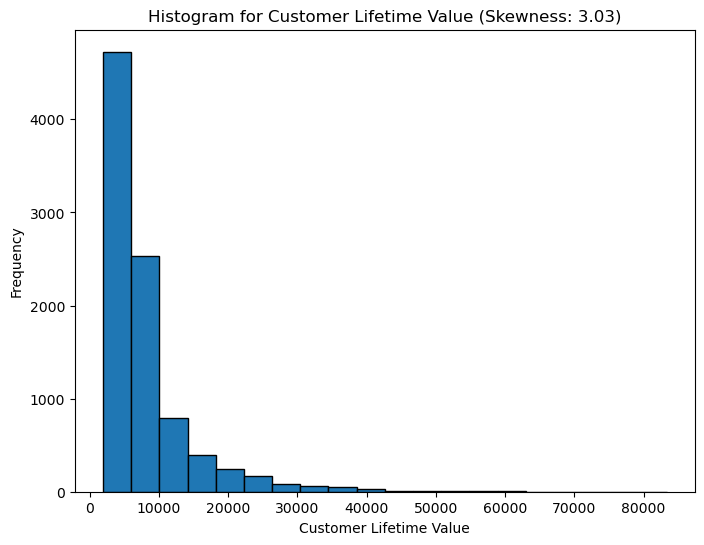

The distribution of Customer Lifetime Value is positively skewed.


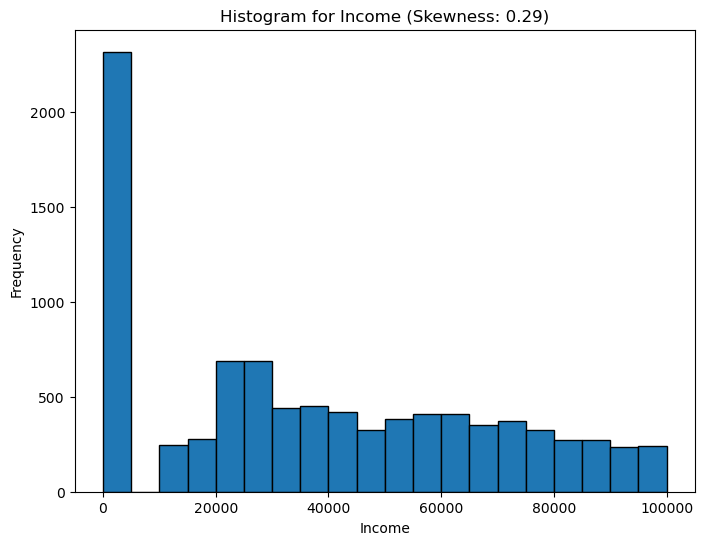

The distribution of Income is positively skewed.


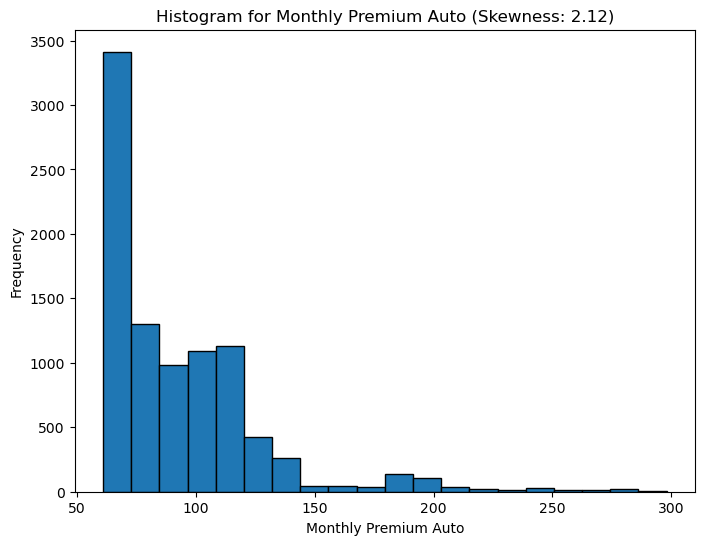

The distribution of Monthly Premium Auto is positively skewed.


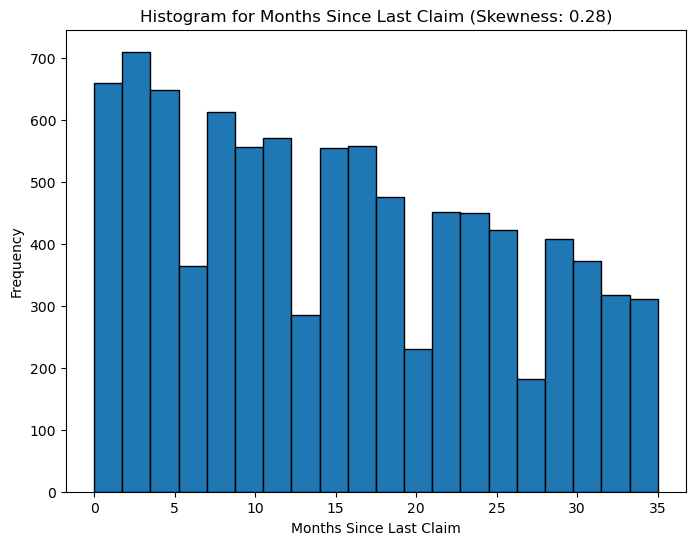

The distribution of Months Since Last Claim is positively skewed.


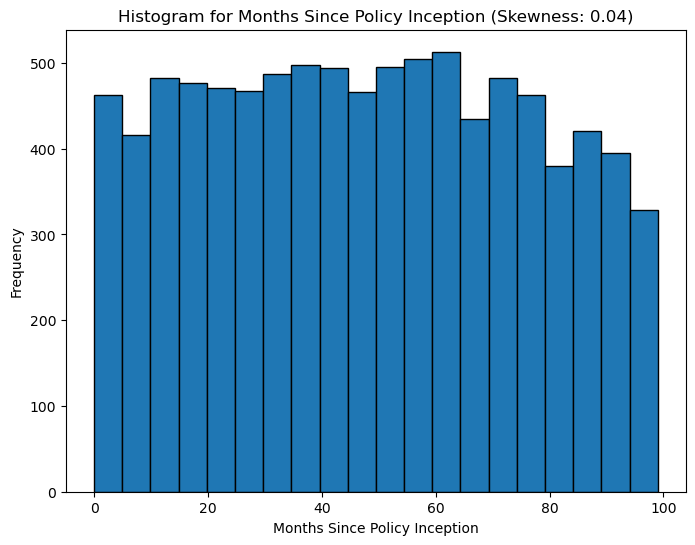

The distribution of Months Since Policy Inception is positively skewed.


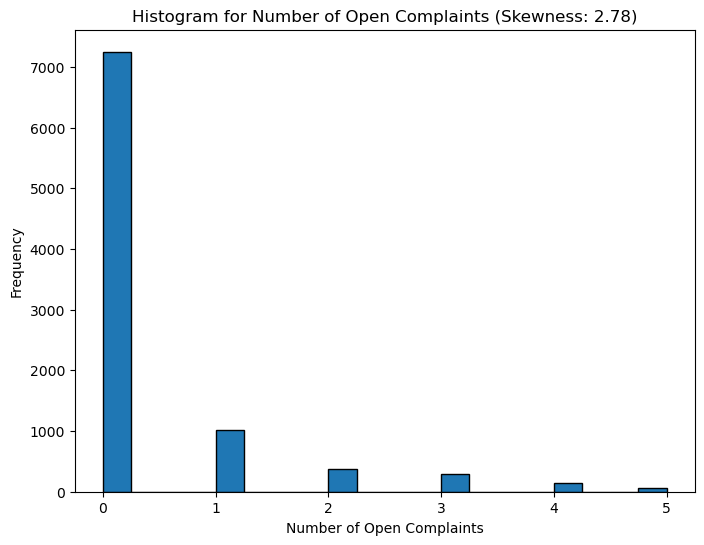

The distribution of Number of Open Complaints is positively skewed.


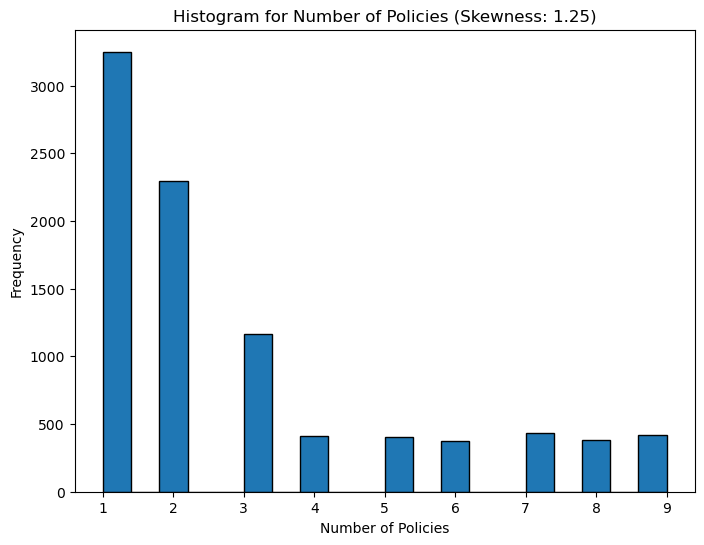

The distribution of Number of Policies is positively skewed.


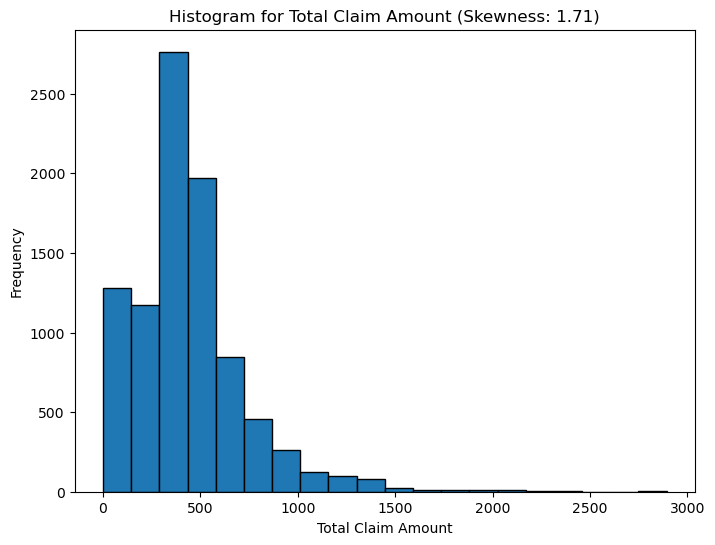

The distribution of Total Claim Amount is positively skewed.


In [14]:
from scipy.stats import skew
for column in numerical:
    plt.figure(figsize=(8, 6))
    
    # Plot the histogram
    plt.hist(data[column], bins=20, edgecolor='k')
    
    # Calculate skewness
    skewness = skew(data[column])
    
    # Add a title and labels
    plt.title(f'Histogram for {column} (Skewness: {skewness:.2f})')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Show the plot
    plt.show()
    
    # Comment on skewness
    if skewness > 0:
        print(f"The distribution of {column} is positively skewed.")
    elif skewness < 0:
        print(f"The distribution of {column} is negatively skewed.")
    else:
        print(f"The distribution of {column} is approximately symm.")

<Axes: >

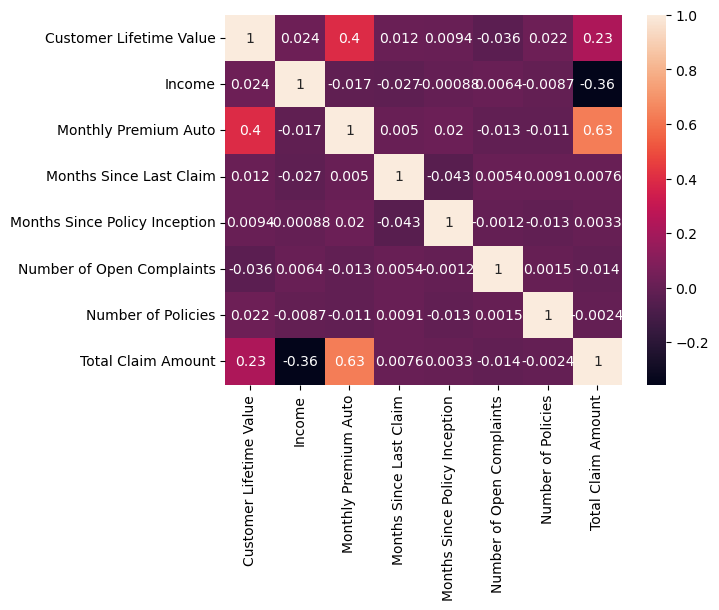

In [15]:
#For the numerical variables, check the multicollinearity between the features. Please note that we will 
#use the column total_claim_amount later as the target variable.

df2 = numerical.copy()
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)

In [ ]:
#If you find a pair of columns that show a high correlation between them (greater than 0.9), drop the one
#that is less correlated with the column total_claim_amount. Write code for both the correlation matrix.
#If there is no pair of features that have a high correlation,
#then do not drop any features.
#df2 = numerical.copy()
correlation_matrix = numerical.corr()
correlated_pairs = []
for i in range(len(correlation_matrix.columns)-1):
    for j in range(i+1,len(correlation_matrix.columns)):
        col1 = correlation_matrix.columns[i]
        col2 = correlation_matrix.columns[j]
        corr = correlation_matrix.loc[col1, col2]
        if abs(corr)> 0.9:
            correlated_pairs.append((col1, col2, corr))
    
columns_to_drop = set()
for col1, col2, corr in correlated_pairs:
    if abs(corr) > abs(correlation_matrix.loc['Total Claim Amount', col1]):
        columns_to_drop.add(col2)
    else:
        columns_to_drop.add(col1)

# Drop the columns that are less correlated with 'total_claim_amount'
numerical.drop(columns=columns_to_drop, inplace=True)

# Print the columns that were dropped
print("Dropped columns:", columns_to_drop)
print(correlated_pairs)
    

<Axes: >

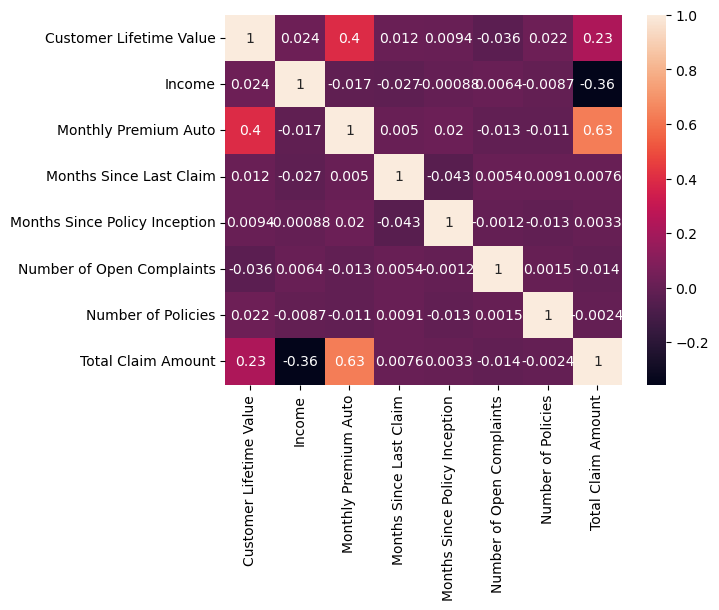

In [16]:
#Plot the heatmap of the correlation matrix after the filtering.
correlation_matrix = numerical.corr()
sns.heatmap(correlation_matrix, annot=True)

In [17]:
# lab model generation and validation


In [18]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
data1 = pd.read_csv('marketing_customer_analysis.csv')
data1.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [20]:
#Select the columns which are correlated with total_claim_amount and don't suffer from multicollinearity
#(see the previous lab)
data = data1.copy()
data_2=data[[ "Monthly Premium Auto" ,"Total Claim Amount"]]
data_2.head()

,Monthly Premium Auto,Total Claim Amount
0,69,384.811147
1,94,1131.464935
2,108,566.472247
3,106,529.881344
4,73,138.130879


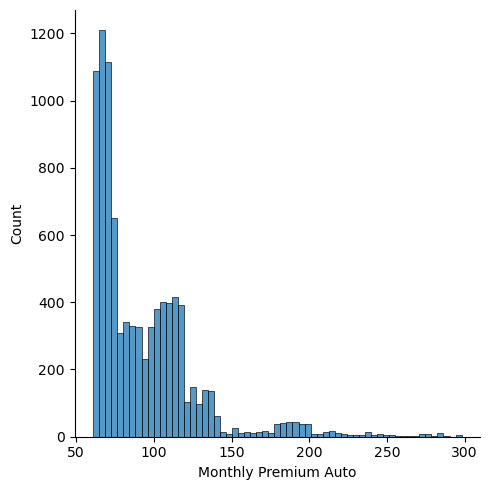

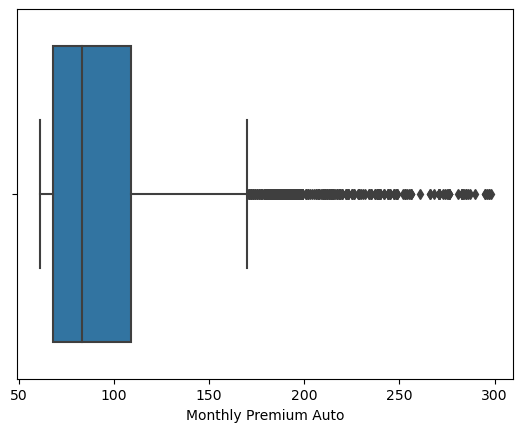

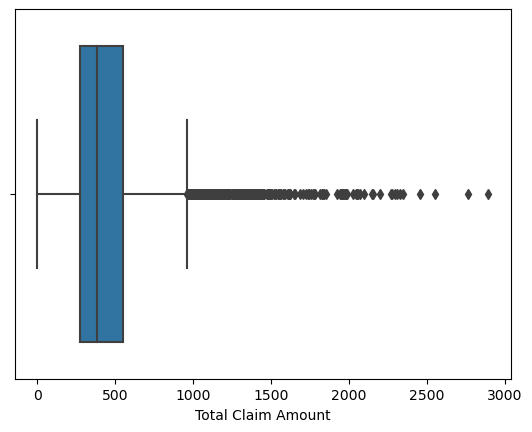

In [21]:
#histogram for Monthly Premium Auto
sns.displot(data['Monthly Premium Auto'])
plt.show()
#box plot
sns.boxplot(x=data['Monthly Premium Auto'])
plt.show()
sns.boxplot(x=data['Total Claim Amount'])
plt.show()

#Remove outliers
The distribution is heavily skewed on the right, the are no outliers because there ar enot isolated dots. We wil need to transform both columns before predictions

In [22]:
#X-y split. (define which column you want to predict, and which ones you will use to make the prediction)
#labels
y = data['Total Claim Amount']
X = data[['Monthly Premium Auto']]
X.head()

#Use the Train-test split to create the Train, and Test sets (make sure to set the random_state option to any 
#integer number of your choice).
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
#Use the pd.DataFrame() function to create new Pandas DataFrames from the X_train, and X_test Numpy arrays obtained 
#in the previous step (make sure to use the columns= option to set the columns names to X.columns)
X_train_df = pd.DataFrame(X_train, columns = X.columns,index = X_train.index)
X_test_df  = pd.DataFrame(X_test,  columns = X.columns ,index = X_test.index)

#Split the X_train Pandas DataFrame into two: numerical, and categorical using df.select_dtypes().
already numerical columns

In [24]:
#If you need to transform any column, Train your transformers and/or scalers all the numerical columns using the .
#fit() only in the Train set (only one transformer/scaler for all the columns, check here, and here using the .transform()

from sklearn.preprocessing import PowerTransformer

# Create an instance of PowerTransformer
power_transformer = PowerTransformer(method='box-cox', standardize=False)  # You can adjust method and other parameters

# Fit and transform the training set
X_train_transformed = power_transformer.fit_transform(X_train_df)

# Transform the test set using the same transformation
X_test_transformed = power_transformer.transform(X_test_df)

In [25]:
#Save all your transformers/scalers right after the .fit() using pickle using the code shown below:
import pickle
import os

path = "./"                                        # Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "powertrans.pkl" # Use a descriptive name for your scaler/transformer but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
     pickle.dump(power_transformer, file) # Replace "variable" with the name of the variable that contains your transformer




In [26]:
#If you used a transformer/scaler in the previous step, create new Pandas DataFrames from the Numpy 
#arrays generated by the .transform() using the pd.DataFrame() function as you did earlier with the Numpy arrays
#generated by the train_test_split() function.

# We create new Pandas DataFrames out of the Numpy arrays.

X_train_scaled_df = pd.DataFrame(X_train_transformed, columns=X_train_df.columns)
X_test_scaled_df  = pd.DataFrame(X_test_transformed,  columns=X_test_df.columns)

X_train_scaled_df.tail()

,Monthly Premium Auto
7302,0.696344
7303,0.696783
7304,0.697618
7305,0.697686
7306,0.697056


In [27]:
from sklearn.preprocessing import OneHotEncoder

# Identify categorical columns based on the data types in the original DataFrame 'data'
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()

# Subset your DataFrame to select only the categorical columns
X_cat = data[categorical_columns]

X_cat_train, X_cat_test, y_cat_train, y_cat_test = train_test_split(X_cat, y, test_size=0.2, random_state=42)

#X_test_cat = X_cat[categorical_columns]  # If you need to encode the test set too

# Create and fit the encoder on the training data
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
encoder.fit(X_cat_train)  # Fit on the training data

# Transform the categorical columns for both training and test sets
X_train_encoded = encoder.transform(X_cat_train)
X_test_encoded = encoder.transform(X_cat_test)  # Use X_test_cat here
# Create DataFrames for the encoded data
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(X_cat_train.columns))
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(X_cat_test.select_dtypes(object).columns))
X_train_encoded_df.head()


C:\Users\Megha\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,Customer_AA16582,Customer_AA30683,Customer_AA34092,Customer_AA35519,Customer_AA56476,Customer_AA69265,Customer_AA71604,Customer_AA93585,Customer_AB13432,Customer_AB21519,...,Sales Channel_Branch,Sales Channel_Call Center,Sales Channel_Web,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car,Vehicle Size_Medsize,Vehicle Size_Small
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [28]:
#save all your transformers/scalers right after the .fit() using pickle using the code shown below:
path = "encoders/"
# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
  # Create a new directory because it does not exist
  os.makedirs(path)
print("The new directory is created!")

filename = "encodedfile.pkl" # use a descriptive name for your encoder but keep the ".pkl" file extension
with open(path+filename, "wb") as file:
    pickle.dump(encoder, file) # Replace "variable" with the name of the variable that contains your transformer

The new directory is created!


In [29]:
# column coverage grouping
def clean_coverage_mapping(x): 
    if x =='Basic':
        return "Basic"
    else:
        return 'Extended or premium' 

data['Coverage'] = list(map(clean_coverage_mapping, data['Coverage']))
# education grouping
def education_mapping(x): 
    if x =='Master' or x== "Doctor":
        return "Professional"
    elif x == 'High School or below':
        return 'High School or below'
    elif x =='Bachelor':
        return 'Bachelor'
    else:
        return "College"  
    
data['Education'] = list(map(education_mapping, data['Education']))   

# policy grouping
def policy_mapping(x): 
    if x == 'Corporate Auto' or x== "Special Auto":
        return "Auto"
    else:
        return "Personal Auto"
data['Policy Type'] = list(map(policy_mapping, data['Policy Type']))   


In [30]:
#Use .replace() to cast into numbers any categorical ordinal column replacing each label with a number that: 
#respects the order of the labels and the relative "distance"
# state coverage education estatus location code policy type sales channel v class and size
# Define mapping dictionaries for each ordinal column
coverage_mapping = {
    'Basic': 1,
    'Extended or premium' : 2
    }

education_mapping = {
    'High School or below': 3,
    'Bachelor': 1,
    "College"  : 2,
    'Professional' : 4
   
}

vehiclesize_mapping = {
    'Medsize': 1,
    'Small' :2, 
    "Large": 3
    
   }

policy_type_mapping = {
    'Personal Auto': 1,
    'Auto' :2, 
       
   }

# Use .replace() to replace the labels with numerical values
data['Coverage'] = data['Coverage'].replace(coverage_mapping)
data['Education'] = data['Education'].replace(education_mapping)
data['Vehicle Size'] = data['Vehicle Size'].replace(vehiclesize_mapping)

data['Policy Type'] = data['Policy Type'].replace(policy_type_mapping)

In [31]:
# Concatenate numerical_transformed and categorical_transformed DataFrames using pd.concat()
preprocessed_data = pd.concat([X_train_scaled_df, X_train_encoded_df], axis=1)

# Apply another MinMaxScaler to the concatenated DataFrame
from sklearn.preprocessing import MinMaxScaler

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the concatenated DataFrame
preprocessed_data_scaled = scaler.fit_transform(preprocessed_data)

# Convert the scaled Numpy array back to a DataFrame
preprocessed_data_scaled_df = pd.DataFrame(preprocessed_data_scaled, columns=preprocessed_data.columns)

# Now, preprocessed_data_scaled_df contains both numerical and encoded categorical columns, all scaled.


In [32]:
import os
import pickle

path = "scalers/"  # Define the directory path to save the scalers
isExist = os.path.exists(path)

if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

filename = "min_max_scaler.pkl"  # Use a descriptive name for your scaler but keep the ".pkl" file extension

# Save the MinMaxScaler using pickle
with open(path + filename, "wb") as file:
    pickle.dump(scaler, file)  # Replace "scaler" with the name of your MinMaxScaler variable


In [33]:
#Apply linear regression to the Pandas DataFrame obtained in the previous step using sklearn
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model on your training data
model.fit(X_train_encoded_df, y_train)  # Assuming X_train_encoded_df contains your training data

# Make predictions on the test data
y_pred = model.predict(X_test_encoded_df)  # Assuming X_test_encoded_df contains your test data



In [34]:
#Remember to save your linear model right after the .fit() using pickle using the code shown below:
import os
import pickle

# Define the path where you want to save the model
path = "models/"

# Check whether the specified path exists or not
isExist = os.path.exists(path)
if not isExist:
    # Create a new directory because it does not exist
    os.makedirs(path)
    print("The new directory is created!")

# Specify the filename for your model
filename = "linear_regression_model.pkl"

# Save the trained linear regression model using pickle
with open(os.path.join(path, filename), "wb") as file:
    pickle.dump(model, file)  # Replace "model" with the name of your linear regression model variable


Compute the following metrics for your Train and Test sets:

R2.
MSE.
RMSE
MAE.


In [35]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate R2 for Train and Test sets
train_predictions = model.predict(X_train_encoded_df)  # Replace with your encoded training data
test_predictions = model.predict(X_test_encoded_df)    # Replace with your encoded test data

r2_train = r2_score(y_train, train_predictions)
r2_test = r2_score(y_test, test_predictions)

# Calculate MSE for Train and Test sets
mse_train = mean_squared_error(y_train, train_predictions)
mse_test = mean_squared_error(y_test, test_predictions)

# Calculate RMSE for Train and Test sets
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

# Calculate MAE for Train and Test sets
mae_train = mean_absolute_error(y_train, train_predictions)
mae_test = mean_absolute_error(y_test, test_predictions)

# Print the metrics
print("R2 - Train:", r2_train)
print("R2 - Test:", r2_test)
print("MSE - Train:", mse_train)
print("MSE - Test:", mse_test)
print("RMSE - Train:", rmse_train)
print("RMSE - Test:", rmse_test)
print("MAE - Train:", mae_train)
print("MAE - Test:", mae_test)

R2 - Train: 1.0
R2 - Test: 0.6957020877198316
MSE - Train: 1.0206022173645164e-22
MSE - Test: 24195.04370909151
RMSE - Train: 1.0102485918646541e-11
RMSE - Test: 155.54756092299073
MAE - Train: 6.8531505626599585e-12
MAE - Test: 106.7626872961231


In [36]:
import pandas as pd

# Metrics as dictionaries
train_metrics = {
    'R2': 1.0,
    'MSE': 1.0206022173645164e-22,
    'RMSE': 1.0102485918646541e-11,
    'MAE': 6.8531505626599585e-12
}

test_metrics = {
    'R2': 0.6957020877198316,
    'MSE': 24195.04370909151,
    'RMSE': 155.54756092299073,
    'MAE': 106.7626872961231
}

# Create DataFrames from the dictionaries
train_metrics_df = pd.DataFrame(list(train_metrics.items()), columns=['Metric', 'Value - Train'])
test_metrics_df = pd.DataFrame(list(test_metrics.items()), columns=['Metric', 'Value - Test'])

# Merge the two DataFrames
error_metrics_df = pd.merge(train_metrics_df, test_metrics_df, on='Metric')

# Display the DataFrame
display(error_metrics_df)


,Metric,Value - Train,Value - Test
0,R2,1.000000e+00,0.695702
1,MSE,1.020602e-22,24195.043709
2,RMSE,1.010249e-11,155.547561
3,MAE,6.853151e-12,106.762687
